In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import RootMeanSquaredError, Recall, Precision
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read in Data File

In [3]:
# Read in the cleaned data file

delays = pd.read_parquet('./drive/MyDrive/Colab Notebooks/cleaned_delays_export_100.parquet')

In [4]:
# View the first five rows of the data

delays.head()

,year,month,day_of_week,op_carrier,origin,dest,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flight_delay
0,2019,12,4,American,TPA,DFW,1355,1410,15.0,1550,1557,7.0,175.0,167.0,929.0,0,0,0,0,0,1
1,2019,12,1,Skywest,MCI,SLC,820,820,0.0,1023,1003,0.0,183.0,163.0,920.0,0,0,0,0,0,0
2,2019,12,4,Southwest,LAX,ELP,1855,1852,0.0,2145,2129,0.0,110.0,97.0,715.0,0,0,0,0,0,0
3,2019,12,3,Delta,RDU,BOS,605,601,0.0,803,758,0.0,118.0,117.0,612.0,0,0,0,0,0,0
4,2019,12,3,United,LAX,IAH,600,556,0.0,1115,1102,0.0,195.0,186.0,1379.0,0,0,0,0,0,0


In [5]:
# View the size of the data frame

delays.shape

(11887768, 21)

In [6]:
# View the percentage of delayed flights

delays['flight_delay'].value_counts(normalize = True)

0    0.646676
1    0.353324
Name: flight_delay, dtype: float64

# Encode Categorical Variables

In [7]:
delays = pd.get_dummies(delays)

# Set up X and y Variables

In [8]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

# Train/Test Split

In [9]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# Standard Scaler

In [10]:
# Instantiate standard scaler

sc = StandardScaler()

# Fit and transform X_train
X_train_sc = sc.fit_transform(X_train)

# Transform X_test
X_test_sc = sc.transform(X_test)

# Neural Net

## Model 1 Top 25 Airports

In [14]:
X_train_sc.shape

(3128646, 70)

In [18]:
# Construct network
model = Sequential()

# First layer
model.add(Dense(32,
                input_shape = (70, ),
                activation = 'relu'))

# Second layer
model.add(Dense(128, activation = 'relu'))

# Third layer
model.add(Dense(64, activation = 'relu'))

# Fourth layer
model.add(Dense(32, activation = 'relu'))

# Output layer
model.add(Dense(1, activation = 'sigmoid'))

In [19]:
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [20]:
history = model.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512);

Epoch 1/30
6111/6111 [==============================] - 24s 4ms/step - loss: 0.6386 - accuracy: 0.6407 - val_loss: 0.6361 - val_accuracy: 0.6449
Epoch 2/30
6111/6111 [==============================] - 22s 4ms/step - loss: 0.6335 - accuracy: 0.6469 - val_loss: 0.6326 - val_accuracy: 0.6478
Epoch 3/30
6111/6111 [==============================] - 23s 4ms/step - loss: 0.6308 - accuracy: 0.6492 - val_loss: 0.6311 - val_accuracy: 0.6489
Epoch 4/30
6111/6111 [==============================] - 22s 4ms/step - loss: 0.6289 - accuracy: 0.6513 - val_loss: 0.6295 - val_accuracy: 0.6507
Epoch 5/30
6111/6111 [==============================] - 23s 4ms/step - loss: 0.6274 - accuracy: 0.6526 - val_loss: 0.6289 - val_accuracy: 0.6520
Epoch 6/30
6111/6111 [==============================] - 26s 4ms/step - loss: 0.6260 - accuracy: 0.6540 - val_loss: 0.6275 - val_accuracy: 0.6530
Epoch 7/30
6111/6111 [==============================] - 25s 4ms/step - loss: 0.6248 - accuracy: 0.6549 - val_loss: 0.6261 - val_ac

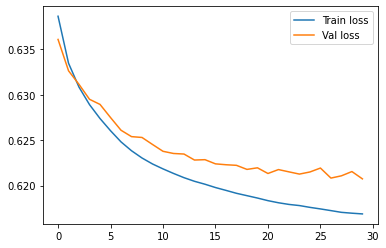

In [21]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Val loss')
plt.legend();

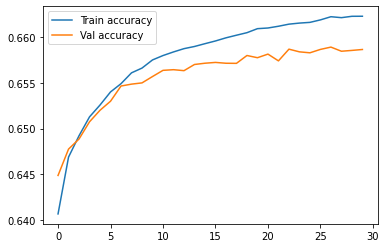

In [22]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val accuracy')
plt.legend();

## Model 2 Top 25 Airports

In [26]:
# Construct network
model_2 = Sequential()

# First layer
model_2.add(Dense(32,
                input_shape = (70, ),
                activation = 'relu'))

# Second layer
model_2.add(Dense(10, activation = 'relu'))

# Third layer
model_2.add(Dense(5, activation = 'relu'))

# Output layer
model_2.add(Dense(1, activation = 'sigmoid'))

In [27]:
model_2.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [28]:
history_2 = model_2.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512);

Epoch 1/30
6111/6111 [==============================] - 14s 2ms/step - loss: 0.6410 - accuracy: 0.6370 - val_loss: 0.6384 - val_accuracy: 0.6405
Epoch 2/30
6111/6111 [==============================] - 13s 2ms/step - loss: 0.6364 - accuracy: 0.6430 - val_loss: 0.6355 - val_accuracy: 0.6440
Epoch 3/30
6111/6111 [==============================] - 13s 2ms/step - loss: 0.6343 - accuracy: 0.6456 - val_loss: 0.6345 - val_accuracy: 0.6453
Epoch 4/30
6111/6111 [==============================] - 13s 2ms/step - loss: 0.6329 - accuracy: 0.6471 - val_loss: 0.6332 - val_accuracy: 0.6469
Epoch 5/30
6111/6111 [==============================] - 13s 2ms/step - loss: 0.6318 - accuracy: 0.6481 - val_loss: 0.6321 - val_accuracy: 0.6478
Epoch 6/30
6111/6111 [==============================] - 13s 2ms/step - loss: 0.6308 - accuracy: 0.6490 - val_loss: 0.6313 - val_accuracy: 0.6485
Epoch 7/30
6111/6111 [==============================] - 13s 2ms/step - loss: 0.6299 - accuracy: 0.6499 - val_loss: 0.6304 - val_ac

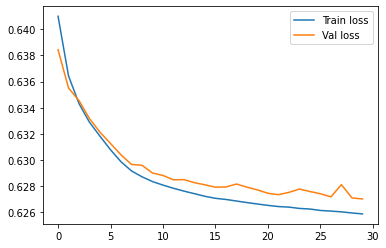

In [30]:
plt.plot(history_2.history['loss'], label = 'Train loss')
plt.plot(history_2.history['val_loss'], label = 'Val loss')
plt.legend();

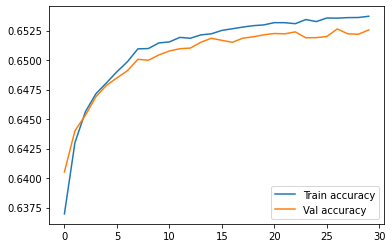

In [31]:
plt.plot(history_2.history['accuracy'], label = 'Train accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'Val accuracy')
plt.legend();

## Model 3 Top 100 Airports

In [16]:
X_train_sc.shape

(8915826, 221)

In [19]:
# Construct network
model_3 = Sequential()

# First layer
model_3.add(Dense(32,
                input_shape = (221, ),
                activation = 'relu'))

# Second layer
model_3.add(Dense(128, activation = 'relu'))

# Third layer
model_3.add(Dense(64, activation = 'relu'))

# Fourth layer
model_3.add(Dense(32, activation = 'relu'))

# Output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [20]:
model_3.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [21]:
history_3 = model_3.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=512);

Epoch 1/30
17414/17414 [==============================] - 92s 5ms/step - loss: 0.6277 - accuracy: 0.6539 - val_loss: 0.6244 - val_accuracy: 0.6573
Epoch 2/30
17414/17414 [==============================] - 88s 5ms/step - loss: 0.6229 - accuracy: 0.6591 - val_loss: 0.6217 - val_accuracy: 0.6600
Epoch 3/30
17414/17414 [==============================] - 89s 5ms/step - loss: 0.6206 - accuracy: 0.6611 - val_loss: 0.6201 - val_accuracy: 0.6615
Epoch 4/30
17414/17414 [==============================] - 100s 6ms/step - loss: 0.6191 - accuracy: 0.6624 - val_loss: 0.6193 - val_accuracy: 0.6620
Epoch 5/30
17414/17414 [==============================] - 93s 5ms/step - loss: 0.6179 - accuracy: 0.6636 - val_loss: 0.6180 - val_accuracy: 0.6633
Epoch 6/30
17414/17414 [==============================] - 102s 6ms/step - loss: 0.6169 - accuracy: 0.6644 - val_loss: 0.6172 - val_accuracy: 0.6644
Epoch 7/30
17414/17414 [==============================] - 94s 5ms/step - loss: 0.6161 - accuracy: 0.6651 - val_loss:

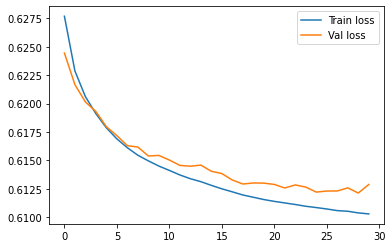

In [22]:
plt.plot(history_3.history['loss'], label = 'Train loss')
plt.plot(history_3.history['val_loss'], label = 'Val loss')
plt.legend();

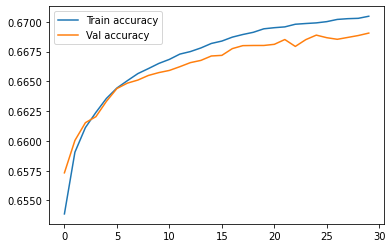

In [23]:
plt.plot(history_3.history['accuracy'], label = 'Train accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'Val accuracy')
plt.legend();

## Model 4 Top 100 Airports

In [11]:
# Construct network
model_4 = Sequential()

# First layer
model_4.add(Dense(64,
                input_shape = (221, ),
                activation = 'relu'))

# Second layer
model_4.add(Dense(128, activation = 'relu'))

# Third layer
model_4.add(Dense(64, activation = 'relu'))

# Fourth layer
model_4.add(Dense(32, activation = 'relu'))

# Output layer
model_4.add(Dense(1, activation = 'sigmoid'))

In [12]:
model_4.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [13]:
history_4 = model_4.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=1024);

Epoch 1/30
8707/8707 [==============================] - 80s 9ms/step - loss: 0.6277 - accuracy: 0.6539 - val_loss: 0.6242 - val_accuracy: 0.6575
Epoch 2/30
8707/8707 [==============================] - 81s 9ms/step - loss: 0.6221 - accuracy: 0.6597 - val_loss: 0.6205 - val_accuracy: 0.6612
Epoch 3/30
8707/8707 [==============================] - 78s 9ms/step - loss: 0.6190 - accuracy: 0.6624 - val_loss: 0.6184 - val_accuracy: 0.6631
Epoch 4/30
8707/8707 [==============================] - 71s 8ms/step - loss: 0.6169 - accuracy: 0.6643 - val_loss: 0.6169 - val_accuracy: 0.6647
Epoch 5/30
8707/8707 [==============================] - 70s 8ms/step - loss: 0.6152 - accuracy: 0.6662 - val_loss: 0.6156 - val_accuracy: 0.6661
Epoch 6/30
8707/8707 [==============================] - 84s 10ms/step - loss: 0.6138 - accuracy: 0.6673 - val_loss: 0.6144 - val_accuracy: 0.6670
Epoch 7/30
8707/8707 [==============================] - 67s 8ms/step - loss: 0.6129 - accuracy: 0.6681 - val_loss: 0.6139 - val_a

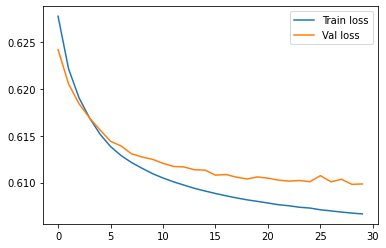

In [14]:
plt.plot(history_4.history['loss'], label = 'Train loss')
plt.plot(history_4.history['val_loss'], label = 'Val loss')
plt.legend();

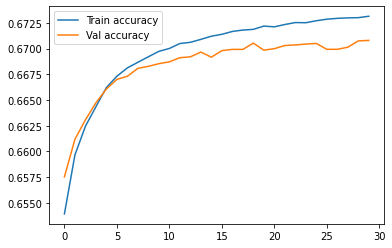

In [15]:
plt.plot(history_4.history['accuracy'], label = 'Train accuracy')
plt.plot(history_4.history['val_accuracy'], label = 'Val accuracy')
plt.legend();

## Model 5 Top 100 Airports

In [11]:
# Construct network
model_5 = Sequential()

# First layer
model_5.add(Dense(64,
                input_shape = (224, ),
                activation = 'relu'))

# Second layer
model_5.add(Dense(128, activation = 'relu'))

# Third layer
model_5.add(Dense(64, activation = 'relu'))

# Fourth layer
model_5.add(Dense(32, activation = 'relu'))

# Output layer
model_5.add(Dense(1, activation = 'sigmoid'))

In [12]:
model_5.compile(loss = 'binary_crossentropy', metrics = ['accuracy', Precision(), Recall()], optimizer = 'adam')

In [13]:
history_5 = model_5.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=30, batch_size=2048);

Epoch 1/30
4354/4354 [==============================] - 45s 10ms/step - loss: 0.6280 - accuracy: 0.6533 - precision: 0.5411 - recall: 0.1229 - val_loss: 0.6248 - val_accuracy: 0.6567 - val_precision: 0.5441 - val_recall: 0.1744
Epoch 2/30
4354/4354 [==============================] - 40s 9ms/step - loss: 0.6227 - accuracy: 0.6589 - precision: 0.5586 - recall: 0.1651 - val_loss: 0.6211 - val_accuracy: 0.6604 - val_precision: 0.5610 - val_recall: 0.1790
Epoch 3/30
4354/4354 [==============================] - 40s 9ms/step - loss: 0.6197 - accuracy: 0.6618 - precision: 0.5654 - recall: 0.1851 - val_loss: 0.6190 - val_accuracy: 0.6623 - val_precision: 0.5638 - val_recall: 0.1953
Epoch 4/30
4354/4354 [==============================] - 40s 9ms/step - loss: 0.6176 - accuracy: 0.6637 - precision: 0.5686 - recall: 0.1991 - val_loss: 0.6175 - val_accuracy: 0.6636 - val_precision: 0.5785 - val_recall: 0.1768
Epoch 5/30
4354/4354 [==============================] - 40s 9ms/step - loss: 0.6160 - accur

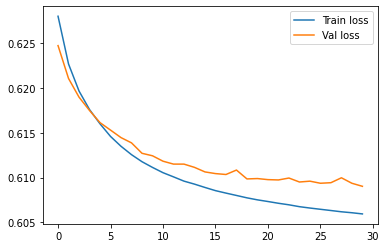

In [14]:
plt.plot(history_5.history['loss'], label = 'Train loss')
plt.plot(history_5.history['val_loss'], label = 'Val loss')
plt.legend();

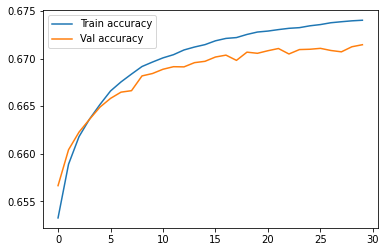

In [15]:
plt.plot(history_5.history['accuracy'], label = 'Train accuracy')
plt.plot(history_5.history['val_accuracy'], label = 'Val accuracy')
plt.legend();

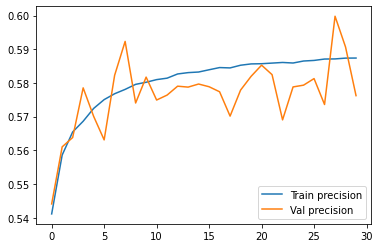

In [16]:
plt.plot(history_5.history['precision'], label = 'Train precision')
plt.plot(history_5.history['val_precision'], label = 'Val precision')
plt.legend();

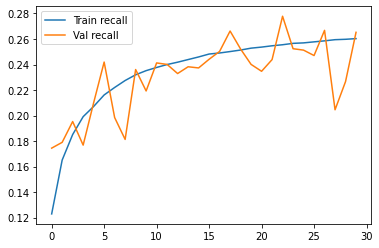

In [17]:
plt.plot(history_5.history['recall'], label = 'Train recall')
plt.plot(history_5.history['val_recall'], label = 'Val recall')
plt.legend();

##Model 6 Top 100 Airports 50 Epochs

In [11]:
X_train.shape

(8915826, 224)

In [22]:
# Instantiate model
model_6 = Sequential()

# First layer
model_6.add(Dense(64,
                input_shape = (224, ),
                activation = 'relu'))

# Second layer
model_6.add(Dense(128, activation = 'relu'))

# Third layer
model_6.add(Dense(64, activation = 'relu'))

# Fourth layer
model_6.add(Dense(32, activation = 'relu'))

# Output layer
model_6.add(Dense(1, activation = 'sigmoid'))

In [13]:
# Compile the model

model_6.compile(loss = 'binary_crossentropy', metrics = ['accuracy', Precision()], optimizer = 'adam')

In [14]:
# Fit the model

history_6 = model_6.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50, batch_size=2048);

Epoch 1/50
4354/4354 [==============================] - 43s 9ms/step - loss: 0.6282 - accuracy: 0.6529 - precision: 0.5391 - val_loss: 0.6250 - val_accuracy: 0.6565 - val_precision: 0.5481
Epoch 2/50
4354/4354 [==============================] - 39s 9ms/step - loss: 0.6225 - accuracy: 0.6593 - precision: 0.5598 - val_loss: 0.6211 - val_accuracy: 0.6610 - val_precision: 0.5610
Epoch 3/50
4354/4354 [==============================] - 38s 9ms/step - loss: 0.6194 - accuracy: 0.6622 - precision: 0.5659 - val_loss: 0.6191 - val_accuracy: 0.6624 - val_precision: 0.5618
Epoch 4/50
4354/4354 [==============================] - 39s 9ms/step - loss: 0.6174 - accuracy: 0.6639 - precision: 0.5688 - val_loss: 0.6172 - val_accuracy: 0.6641 - val_precision: 0.5692
Epoch 5/50
4354/4354 [==============================] - 38s 9ms/step - loss: 0.6159 - accuracy: 0.6651 - precision: 0.5712 - val_loss: 0.6161 - val_accuracy: 0.6652 - val_precision: 0.5749
Epoch 6/50
4354/4354 [==============================] -

## Model 7 Top 100 Airports Early Stopping

In [11]:
# Instantiate model
model_7 = Sequential()

# First layer
model_7.add(Dense(64,
                input_shape = (224, ),
                activation = 'relu'))

# Second layer
model_7.add(Dense(128, activation = 'relu'))

# Third layer
model_7.add(Dense(64, activation = 'relu'))

# Fourth layer
model_7.add(Dense(32, activation = 'relu'))

# Output layer
model_7.add(Dense(1, activation = 'sigmoid'))

In [12]:
# Compile the model

model_7.compile(loss = 'binary_crossentropy', metrics = ['accuracy', Precision()], optimizer = 'adam')

In [13]:
# Create a callback

early_stop = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 5, verbose = 1, mode = 'auto')

In [14]:
# Fit the model

history_7 = model_7.fit(X_train_sc, y_train, validation_data=(X_test_sc, y_test), epochs=50, batch_size=2048, callbacks = [early_stop]);

Epoch 1/50
4354/4354 [==============================] - 43s 9ms/step - loss: 0.6281 - accuracy: 0.6534 - precision: 0.5431 - val_loss: 0.6249 - val_accuracy: 0.6566 - val_precision: 0.5529
Epoch 2/50
4354/4354 [==============================] - 38s 9ms/step - loss: 0.6227 - accuracy: 0.6588 - precision: 0.5590 - val_loss: 0.6210 - val_accuracy: 0.6607 - val_precision: 0.5632
Epoch 3/50
4354/4354 [==============================] - 38s 9ms/step - loss: 0.6197 - accuracy: 0.6617 - precision: 0.5646 - val_loss: 0.6193 - val_accuracy: 0.6615 - val_precision: 0.5538
Epoch 4/50
4354/4354 [==============================] - 39s 9ms/step - loss: 0.6177 - accuracy: 0.6634 - precision: 0.5676 - val_loss: 0.6183 - val_accuracy: 0.6632 - val_precision: 0.5723
Epoch 5/50
4354/4354 [==============================] - 40s 9ms/step - loss: 0.6162 - accuracy: 0.6648 - precision: 0.5706 - val_loss: 0.6169 - val_accuracy: 0.6641 - val_precision: 0.5744
Epoch 6/50
4354/4354 [==============================] -

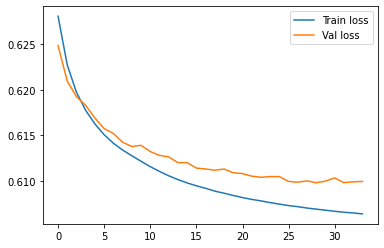

In [16]:
plt.plot(history_7.history['loss'], label = 'Train loss')
plt.plot(history_7.history['val_loss'], label = 'Val loss')
plt.legend();

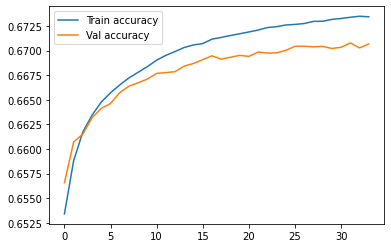

In [18]:
plt.plot(history_7.history['accuracy'], label = 'Train accuracy')
plt.plot(history_7.history['val_accuracy'], label = 'Val accuracy')
plt.legend();

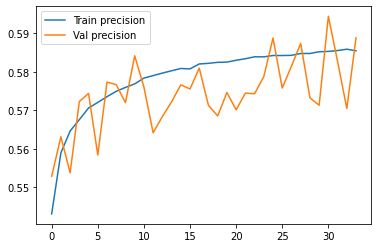

In [19]:
plt.plot(history_7.history['precision'], label = 'Train precision')
plt.plot(history_7.history['val_precision'], label = 'Val precision')
plt.legend();